In [7]:
import IPython

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

import numpy as np

import os

import librosa
import librosa.display
from ADL_Autoencoder import Autoencoder, load

C:\Users\luthe\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


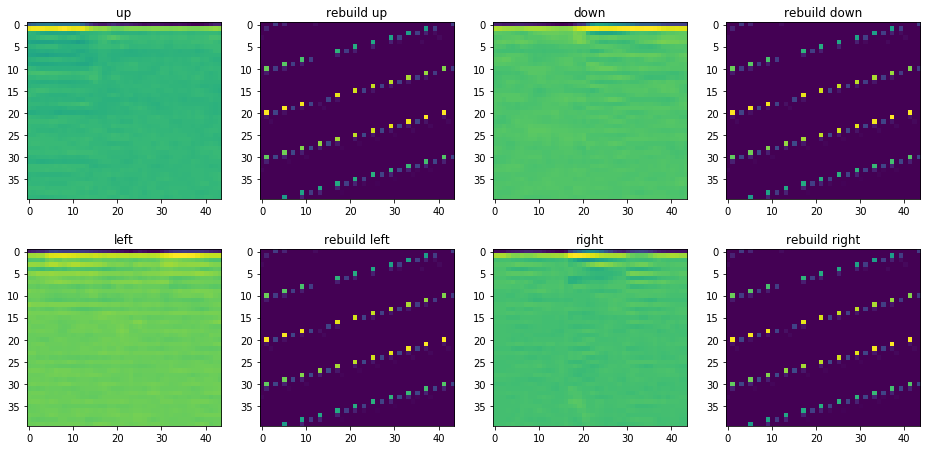

In [21]:
#loading the model
n_input=1760
word_list=["up", "down", "left", "right"]
model = Autoencoder(n_input)
model.load_state_dict(torch.load('weights_autoencoder_run2.pt'))
model.eval()
path=r'C:\Users\luthe\Documents\AI\Brainattic_test\data\audio'
path_audio=[]
path_audio_rebuild=[]
#visualizing some reconstruction of the original audio signal
plt.figure(figsize=(16,16))
plt.subplot(441)
for i,(word) in enumerate(word_list):
    #selecting a random audio file for each word
    path_test=os.path.join(path,word+'/')
    path_test=os.path.join(path_test,os.listdir(path_test)[np.random.randint(len(os.listdir(path_test)))])
    
    #stock the path of the original audio to display it later
    path_audio.append(path_test)

    #loading and plotting the original mfcc
    mfcc_input=load(path_test)
    plt.subplot(4,4,(2*i)+1)
    plt.imshow(mfcc_input.reshape(40,44))
    plt.title(word)
    
    #encode and decode the mfcc 
    mfcc_rebuild, weight=model(torch.FloatTensor(mfcc_input.reshape(40*44)))
    
    #plot the resulting mfcc 
    mfcc_rebuild=mfcc_rebuild.detach().numpy().reshape(40,44)
    plt.subplot(4,4,2*(i+1))
    plt.imshow(mfcc_rebuild)
    plt.title('rebuild '+word)
    
    #stock the path of the rebuild audio to display it later
    new_audio=librosa.feature.inverse.mfcc_to_audio(mfcc_rebuild)
    path_audio_rebuild.append(new_audio)

In [12]:
IPython.display.Audio(filename=path_audio[0])

In [13]:
IPython.display.Audio(path_audio_rebuild[0], rate=22050)

In [15]:
IPython.display.Audio(filename=path_audio[1])

In [16]:
IPython.display.Audio(path_audio_rebuild[1], rate=22050)

In [17]:
IPython.display.Audio(filename=path_audio[2])

In [18]:
IPython.display.Audio(path_audio_rebuild[2], rate=22050)

In [19]:
IPython.display.Audio(filename=path_audio[3])

In [20]:
IPython.display.Audio(path_audio_rebuild[3], rate=22050)

### Conclusion 
<br/>
As we can see above, the results of the autoencoder are not very concluant. I didn't have time to optimize the differents parameters or get deeper into what the model encode and decode. First i need to explore more the data. Words can be isolate, the back noise can be delete etc.. Then i need to rethink the structure of the autoencoder, the number of encoding and decoding layer, the size of the "code" layer (4 is probably very small for a 1760 input).